percentage: 0.3
stream: [91, 91, 81, 57, 22, 84, 36, 76, 1, 98, 83, 68, 33, 96, 56, 61, 78, 76, 73, 90, 43, 9, 63, 64, 6, 25, 71, 62, 88, 16, 73, 25, 97, 74, 8, 71, 40, 50, 6, 25, 44, 57, 69, 59, 46, 50, 84, 22, 86, 55, 55, 97, 30, 30, 64, 71, 35, 68, 44, 60, 26, 78, 63, 98, 37, 19, 33, 97, 43, 43, 56, 25, 78, 23, 22, 23, 67, 91, 23, 92, 78, 89, 1, 44, 1, 12, 42, 30, 47, 35, 77, 15, 76, 17, 65, 42, 39, 4, 3, 16, 50, 87, 75, 24, 83, 99, 7, 24, 6, 37, 27, 80, 8, 75, 24, 12, 5, 75, 22, 24, 70, 75, 92, 57, 87, 18, 42, 26, 65, 53, 88, 22, 19, 10, 53, 68, 15, 69, 87, 38, 93, 91, 44, 73, 66, 80, 33, 44, 61, 97, 64, 95, 45, 70, 50, 20, 97, 72, 45, 2, 13, 61, 14, 54, 92, 37, 36, 49, 47, 66, 82, 4, 89, 74, 29, 4, 55, 66, 88, 16, 84, 61, 78, 85, 13, 48, 30, 3, 55, 10, 65, 17, 31, 32, 48, 20, 63, 41, 32, 45, 27, 93, 52, 85, 47, 25, 37, 10, 70, 69, 94, 96, 82, 98, 33, 50, 89, 96, 94, 62, 28, 32, 65, 51, 91, 1, 10, 59, 91, 94, 26, 65, 86, 45, 89, 100, 47, 53, 21, 70, 75, 47, 7, 26, 98, 88, 78, 31, 7

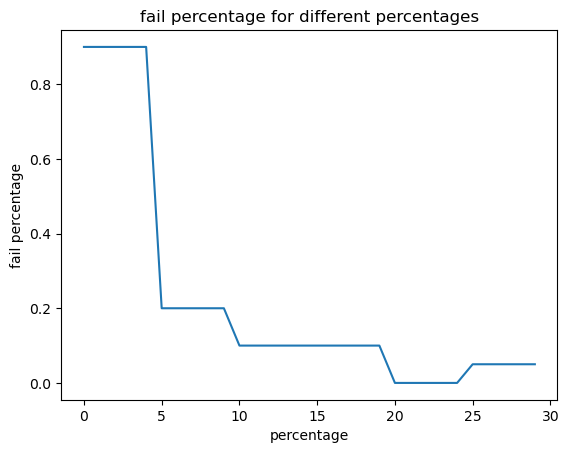

[0.8995502248875562, 0.8995502248875562, 0.8995502248875562, 0.8995502248875562, 0.8995502248875562, 0.19990004997501248, 0.19990004997501248, 0.19990004997501248, 0.19990004997501248, 0.19990004997501248, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.09995002498750624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04997501249375312, 0.04997501249375312, 0.04997501249375312, 0.04997501249375312, 0.04997501249375312]


In [41]:
import random
from bloom_filter import BloomFilter
import matplotlib.pyplot as plt

N = 100
M = 100
stream = [random.randint(0,N) for _ in range(M)] + [2*N] + [random.randint(0,N) for _ in range(M)]

class BaseAlg:

    ## initialization of variables
    # ....

    def alg(self):
        if self.x not in self.bloom:
            self.results['found'].append(False)
            self.bloom.add(self.x)
        else:
            self.results['found'].append(True)



    def validate(self):
        if (len(self.results['found'])!=len(stream)):
            print(f"results['found'] has the wrong size")
        else:
            foundL = []
            appeared = []
            for x in self.stream:
                foundL.append(x in appeared)
                appeared.append(x)
            Fails = 0
            sz = len(self.stream)
            for i in range(sz):
                if (self.results['found'][i]!=foundL[i]):
                    Fails += 1
            print(f"Fails = {Fails} ({Fails/sz*100:.2f}%)")
            self.fail_percentage = Fails/sz*100

class StreamAlg(BaseAlg):
    
    def __init__(self, stream, percentage, size=6):
        self.bloom = BloomFilter(max_elements=M*percentage, error_rate=0.1)
        print(f"stream: {stream}")
        self.stream = stream
        
        self.results = {}
        self.results['found'] = []
        self.x = 0
        self.size = size
        self.fail_percentage = 0
        self.exec()
        self.validate()

    def exec(self):
        for v in self.stream:
            self.x = v
            self.alg()
        for key,value in self.results.items():
            print(f"streaming_{key}: {value}")

    
fail_percentages = []
percentage = 0.3
while percentage >= 0.05:
    print(f"percentage: {percentage}")
    for _ in range(5):
        SA = StreamAlg(stream, percentage, 20)
        fail_percentages.append(SA.fail_percentage)
    percentage -= 0.05
fail_percentages = fail_percentages[::-1]
plt.plot(fail_percentages)
plt.ylabel('fail percentage')
plt.xlabel('percentage')
plt.title('fail percentage for different percentages')
plt.show()

print(fail_percentages)